<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Assignment_13_SVM_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
Forest = pd.read_csv("forestfires.csv")

In [4]:
Forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
Forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
Forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
Forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

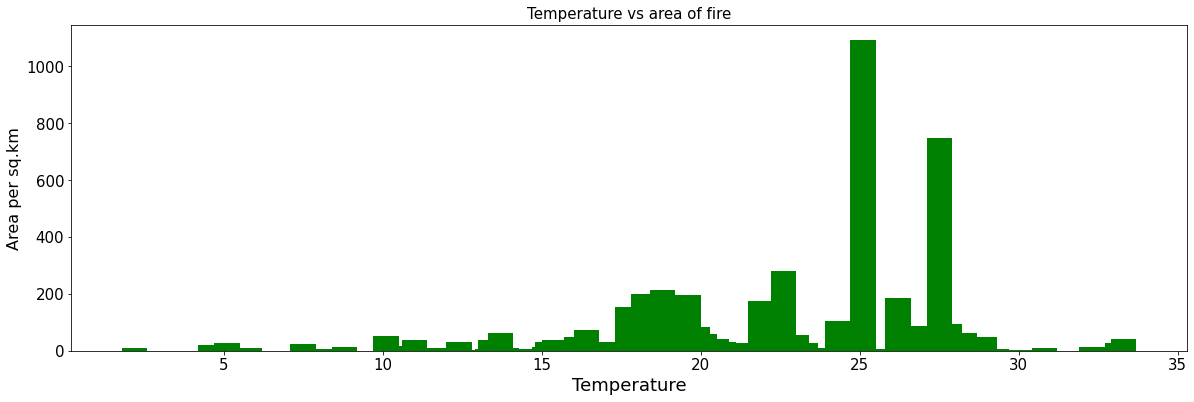

In [11]:
plt.figure(figsize=(20, 6))

plt.title("Temperature vs area of fire" , fontsize=15)
plt.bar(Forest['temp'], Forest['area'], color = "green")

plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Temperature',fontsize=18)
plt.ylabel('Area per sq.km', fontsize=16)
plt.show()

In [14]:
numerical_feature = Forest.describe(include=["int", "float"]).columns

print(list(numerical_feature))

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']


In [15]:
categorical_feature = Forest.describe(include=["object"]).columns

print(list(categorical_feature))

['month', 'day', 'size_category']


Rise in the temperatures has resulted into more area under forestfire

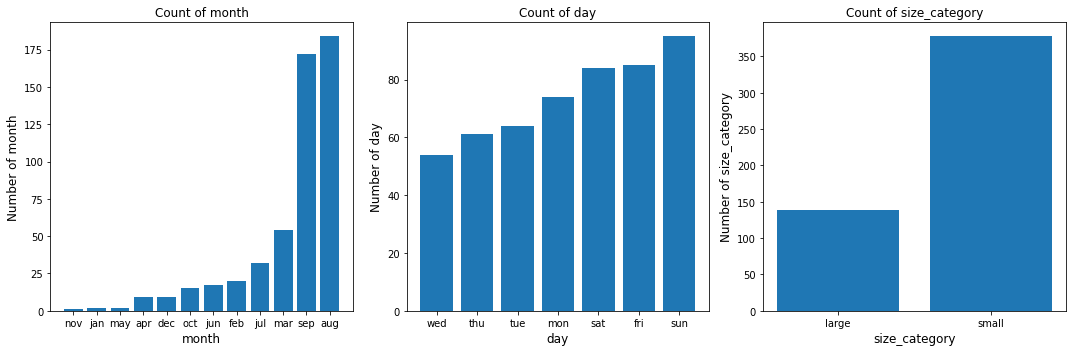

In [16]:
#Categorical features
plt.figure(figsize=(15, 5))
for idx, column in enumerate(categorical_feature):
    df = Forest.copy()
    unique = df[column].value_counts(ascending=True);
 
    plt.subplot(1, 3, idx+1)    
    plt.title("Count of "+ column)
    plt.bar(unique.index, unique.values);
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
    
plt.tight_layout()
plt.show() 

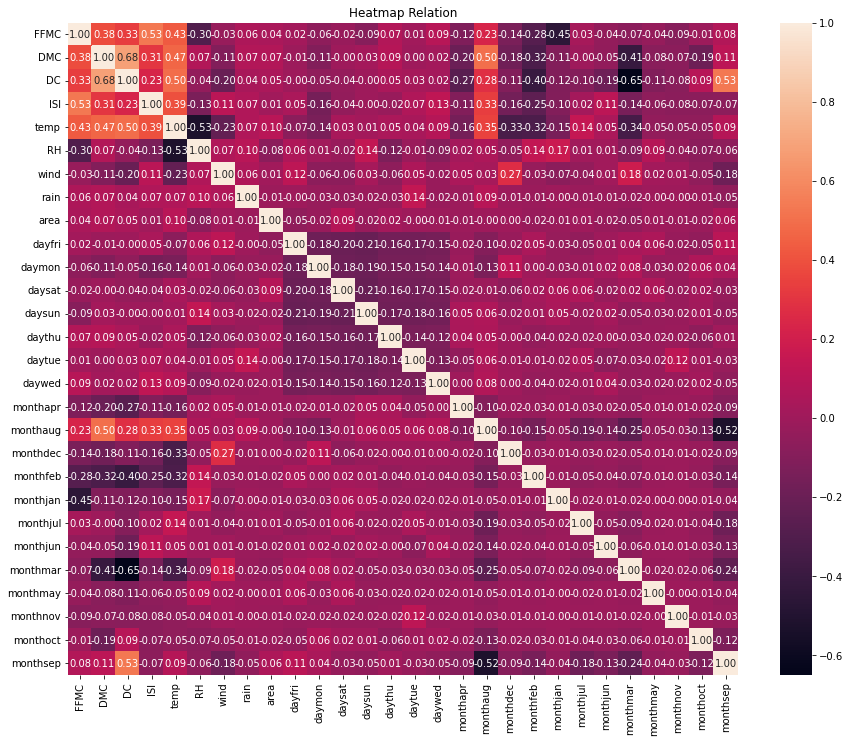

In [19]:
#Numerical features
plt.figure(figsize=(15, 12))

plt.title("Heatmap Relation")

sns.heatmap(Forest[numerical_feature].corr(), annot=True, fmt='.2f');

In [20]:
size = pd.get_dummies(Forest['size_category'], drop_first=True)

In [21]:
size

,small
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [22]:
Forest1 = pd.concat([Forest,size],axis=1)
Forest1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,small
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,small,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,small,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,small,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,small,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,small,1


In [23]:
Forest1 = Forest1.drop(['month','day','size_category'],axis=1)

In [24]:
Forest1.shape

(517, 29)

In [25]:
X=Forest1.iloc[:,0:28]
y=Forest1['small']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [28]:
scaled_X_train= scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [29]:
scaled_X_train.shape, scaled_X_test.shape, y_train.shape, y_test.shape

((413, 28), (104, 28), (413,), (104,))

Grid Search CV

In [30]:
clf = SVC()
param_grid = {'kernel': ['rbf', 'poly','linear'], 'gamma': [50, 10, 6, 5, 4, 0.5], 'C': [15,14,13,12,11,10,1,0.1,0.01,0.001]}
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(scaled_X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.01, 0.001],
                         'gamma': [50, 10, 6, 5, 4, 0.5],
                         'kernel': ['rbf', 'poly', 'linear']})

In [31]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'linear'}, 0.963588850174216)

In [33]:
clf = SVC(kernel='linear', C= 15, gamma = 50)
clf.fit(scaled_X_train , y_train)
y_pred = clf.predict(scaled_X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 96.15384615384616


array([[23,  4],
       [ 0, 77]])

In [ ]:
# ##### Accuracy achieved for linear kernel model is 96%

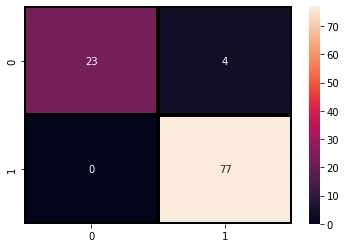

In [34]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)